# Data Science Workflow

In [1]:
!pip install pandas --upgrade

Requirement already up-to-date: pandas in /opt/conda/lib/python3.4/site-packages
Requirement already up-to-date: python-dateutil>=2 in /opt/conda/lib/python3.4/site-packages (from pandas)
Requirement already up-to-date: numpy>=1.7.0 in /opt/conda/lib/python3.4/site-packages (from pandas)
Requirement already up-to-date: pytz>=2011k in /opt/conda/lib/python3.4/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /opt/conda/lib/python3.4/site-packages (from python-dateutil>=2->pandas)


In [2]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

from urllib.request import urlretrieve
urlretrieve(URL, '../data/fremont.csv')


('../data/fremont.csv', <http.client.HTTPMessage at 0x7fcae4079240>)

In [3]:
!head ../data/fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


In [4]:
import pandas as pd

data = pd.read_csv('../data/fremont.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


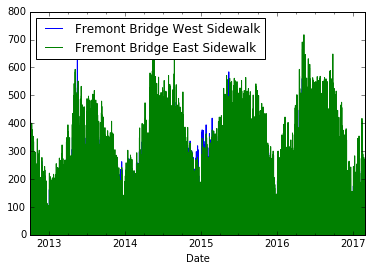

In [5]:
%matplotlib inline
data.plot();

## Weekly resample

In [6]:
data.resample('W').sum().head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-07,7297.0,6995.0
2012-10-14,8679.0,8116.0
2012-10-21,7946.0,7563.0
2012-10-28,6901.0,6536.0
2012-11-04,6408.0,5786.0


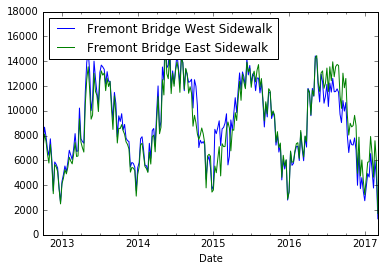

In [7]:
data.resample('W').sum().plot();

## Change stylesheet

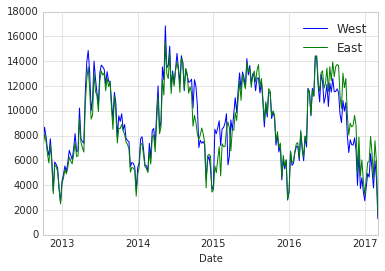

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

data.columns = ['West', 'East']
ax = data.resample('W').sum().plot();
ax.legend(loc=1);

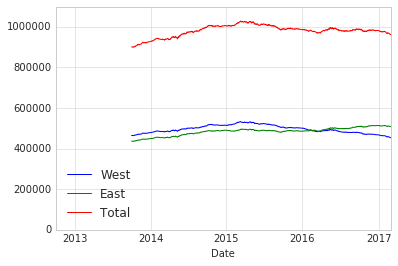

In [9]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

## Trand during the time

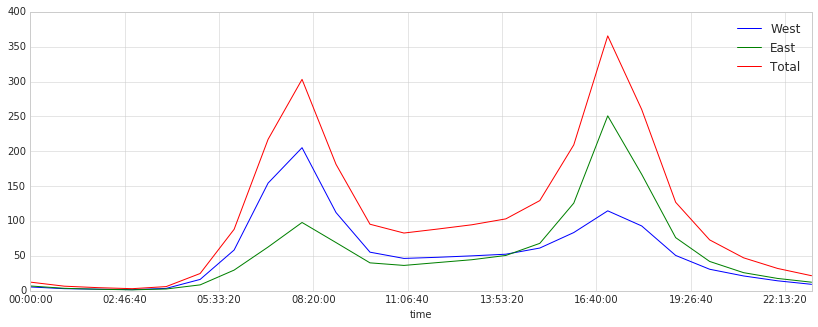

In [10]:
data.groupby(data.index.time).mean().plot(figsize=(14, 5));

More bicycles are crossing the bridge on the West at 8.20 in the morning. While in the evening there are more bicycles crossing the bridge to the East

## Commuting patterns

In [11]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


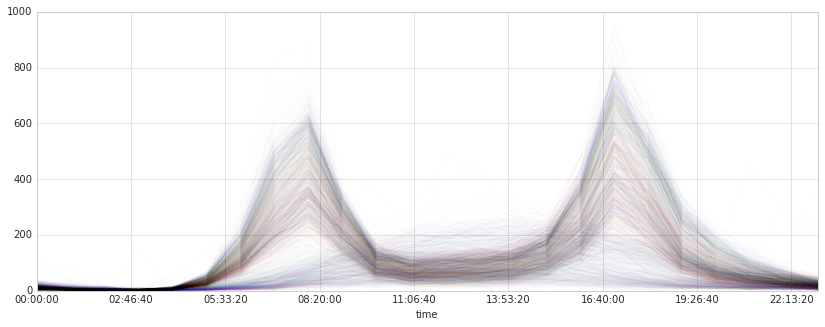

In [13]:
# alpha indicates the transparency of the lines
pivoted.plot(legend=False, alpha=0.01, figsize=(14,5)); 